# Creating a pandas data frame

In [1]:
import pandas as pd

In [2]:
# Creating a dataframe
data = {"calories":[420, 380, 390], "duration":[50,40,45]}
df = pd.DataFrame(data)
print(df)

   calories  duration
0       420        50
1       380        40
2       390        45


In [3]:
data = {
    "Name": ['John','Anna','Mike','Sara','Dave'],
    "Age": [28, 22, 32, 30, 45],
    "Department": ['Sales', 'Marketing','HR','IT','Finance'],
    "Salary":[50000, 60000, 40000, 75000, 120000]                  
}

employee = pd.DataFrame(data)
print(employee)

   Name  Age Department  Salary
0  John   28      Sales   50000
1  Anna   22  Marketing   60000
2  Mike   32         HR   40000
3  Sara   30         IT   75000
4  Dave   45    Finance  120000


In [4]:
# Display the first two rows of the DataFrame
print(employee.head(2))

   Name  Age Department  Salary
0  John   28      Sales   50000
1  Anna   22  Marketing   60000


In [5]:
# Add a new column named Bonus which is 10% of the salary for each employee
employee["Bonus"] = employee["Salary"]*0.10
print(employee)

   Name  Age Department  Salary    Bonus
0  John   28      Sales   50000   5000.0
1  Anna   22  Marketing   60000   6000.0
2  Mike   32         HR   40000   4000.0
3  Sara   30         IT   75000   7500.0
4  Dave   45    Finance  120000  12000.0


In [6]:
# Update the age of the employee name "Mike" to 33.

employee.loc[employee["Name"]=='Mike', 'Age'] = 33
print(employee)

#Use DataFrame.loc attribute to access a particular cell in the given Pandas Dataframe using the index and column labels

   Name  Age Department  Salary    Bonus
0  John   28      Sales   50000   5000.0
1  Anna   22  Marketing   60000   6000.0
2  Mike   33         HR   40000   4000.0
3  Sara   30         IT   75000   7500.0
4  Dave   45    Finance  120000  12000.0


In [7]:
# Delete the "Department" column from the dataframe.
employee = employee.drop(columns=["Department"])
print(employee)

   Name  Age  Salary    Bonus
0  John   28   50000   5000.0
1  Anna   22   60000   6000.0
2  Mike   33   40000   4000.0
3  Sara   30   75000   7500.0
4  Dave   45  120000  12000.0


In [8]:
# Filter the DataFrame to show only employees with a salary greater than 50000.
filtered = employee[employee['Salary']>50000]
print(filtered)

   Name  Age  Salary    Bonus
1  Anna   22   60000   6000.0
3  Sara   30   75000   7500.0
4  Dave   45  120000  12000.0


In [9]:
# Sort the DataFrame by the salary column in descending order.
sorted = filtered.sort_values(by='Salary',ascending=False)
print(sorted)

   Name  Age  Salary    Bonus
4  Dave   45  120000  12000.0
3  Sara   30   75000   7500.0
1  Anna   22   60000   6000.0


In [10]:
# Reset the index of the sorted DataFrame without keeping the original index.
sorted.reset_index(drop=True, inplace=True)
print(sorted)

   Name  Age  Salary    Bonus
0  Dave   45  120000  12000.0
1  Sara   30   75000   7500.0
2  Anna   22   60000   6000.0


# Create a DataFrame named sales_df with the following data

In [11]:
data = {'Region':['East', 'West','East','West','East'], 
        'Salesperson': ['John', 'Anna', 'Mike', 'Sara', 'Dave'],
       'Sales': [7000, 12000, 9000, 11000, 15000]
       }

sales_df = pd.DataFrame(data)
print(sales_df)

  Region Salesperson  Sales
0   East        John   7000
1   West        Anna  12000
2   East        Mike   9000
3   West        Sara  11000
4   East        Dave  15000


In [12]:
# Group the dataframe by the Region and calculate the total sales for each region.
TotalSalesByRegion = sales_df.groupby('Region')['Sales'].sum()
print(TotalSalesByRegion)

Region
East    31000
West    23000
Name: Sales, dtype: int64


In [13]:
# Print the average sales for each salesperson
AverageSales = sales_df.groupby('Salesperson')['Sales'].mean()
print(AverageSales)

Salesperson
Anna    12000.0
Dave    15000.0
John     7000.0
Mike     9000.0
Sara    11000.0
Name: Sales, dtype: float64


# Merging two dataframes
## Merging employee_df and sales_df

In [14]:
# Merge the two DataFrames on the Name (in employee_df) and Salesperson (in sales_df) columns using inner join.
merged_df = pd.merge(employee, sales_df, left_on='Name', right_on='Salesperson', how='inner')
print(merged_df)

   Name  Age  Salary    Bonus Region Salesperson  Sales
0  John   28   50000   5000.0   East        John   7000
1  Anna   22   60000   6000.0   West        Anna  12000
2  Mike   33   40000   4000.0   East        Mike   9000
3  Sara   30   75000   7500.0   West        Sara  11000
4  Dave   45  120000  12000.0   East        Dave  15000


In [15]:
# Display the merged dataframe and include only the Name, Age, Region and Sales columns.
merged_df[['Name', 'Age', 'Region', 'Sales']]

,Name,Age,Region,Sales
0,John,28,East,7000
1,Anna,22,West,12000
2,Mike,33,East,9000
3,Sara,30,West,11000
4,Dave,45,East,15000


In [16]:
# Handle any missing data by filling it with a default value of 0 in the merged DataFrame.
merged_df.fillna(0, inplace=True)
print(merged_df)

   Name  Age  Salary    Bonus Region Salesperson  Sales
0  John   28   50000   5000.0   East        John   7000
1  Anna   22   60000   6000.0   West        Anna  12000
2  Mike   33   40000   4000.0   East        Mike   9000
3  Sara   30   75000   7500.0   West        Sara  11000
4  Dave   45  120000  12000.0   East        Dave  15000


# Data visualization with pandas
## using matplotlib library

In [17]:
import matplotlib.pyplot as plt

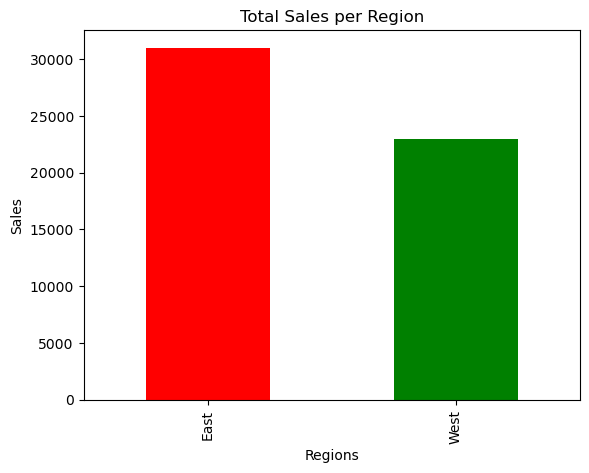

In [21]:
# Create a bar plot showing total sales per region.
TotalSalesByRegion.plot(kind='bar', title='Total Sales per Region', color=['red','green'])
plt.xlabel('Regions')
plt.ylabel('Sales')
plt.show()

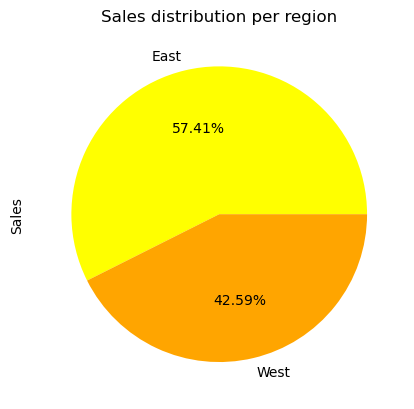

In [22]:
# Create a pie chart representing the sales distribution by region.
TotalSalesByRegion.plot(kind='pie', colors=['yellow','orange'], title='Sales distribution per region', autopct='%1.2f%%')
plt.show()

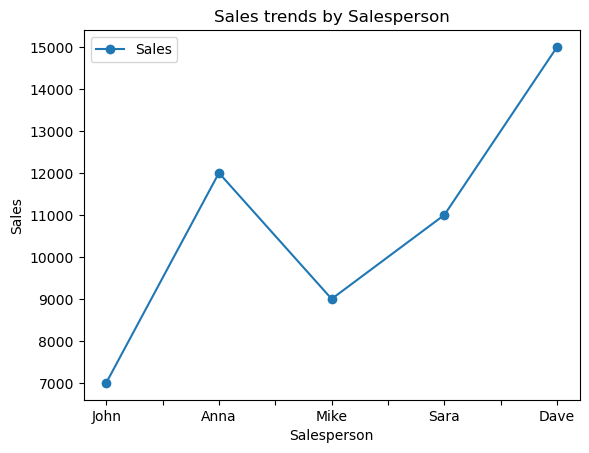

In [23]:
# Display the line chart showing sales trends for each salesperson (consider the index as the order of sales in the DataFrame)
sales_df.plot(kind='line', x='Salesperson', y='Sales', title='Sales trends by Salesperson', marker='o')
plt.ylabel("Sales")
plt.show()